## DBQuery 0811

In [2]:
#01,13,21,25,28,31
candidate = {0:1, 1:13, 2:21, 3:25, 4:28, 5:31}
next_round = 1185

In [68]:
## this code was run.
#!pip install keras-tuner
# import numpy as np
# import pandas as pd
import os
from datetime import datetime
from tqdm import tqdm
# print(f'Current Step #01 [now = {datetime.now()}')
from IPython.display import Markdown

from lib.analy_util import ( draw_markdown,
                             draw_graph,
                             draw_scatter,
                             get_pre_bef,
                             draw_average,
                             get_frequency,
                             get_information,
                             analyze_v1,
                             data_prepare,
                             search_model,
                             get_information_v2,
                             get_extdatas,
                             )
print(f'define this code. [{datetime.now()}]')


title = "Metrics"
row_length = 400
new_to_old = True
show_mark_down = True
markdown_table_limit_length = 5

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

define this code. [2025-08-18 16:59:57.663117]
define this code. [2025-08-18 16:59:57.663460]


In [5]:
# Display the variable's value in Markdown
contents = f"###### Updated {datetime.now()}\n\n### {title}\n"
query = 'select round, metric, bonus from results'
query += f' order by round {"desc" if new_to_old else "asc"}'
limit_str = f'limit {row_length}'
query += f' {limit_str if row_length > 0 else ""}'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
table_rows = ["|round|numbers|bonus|sum|0|10|20|30|40|",
              "|--|--|--|--|--|--|--|--|--|"
             ]
rows_dict = {1:[], 10:[], 20:[], 30:[], 40:[]}
nums_t = []
sums = []
cur_table_limit = 0
print(f'row\'s len = {len(rows)}')
candidate_strs = [f"{i}" for i in candidate.values()]
skip_first = True
for row in rows:
    if skip_first:
        row = f"{next_round}|{",".join(candidate_strs)}|0"
        skip_first = False
    cols = row.split('|')
    if len(cols) == 3:
        num_00 = 0
        num_10 = 0
        num_20 = 0
        num_30 = 0
        num_40 = 0
        nums_list = [int(i) for i in cols[1].split(',')]
        for num in nums_list:
            if num < 10:
                num_00 += 1
            if num >= 10 and num < 20:
                num_10 += 1
            if num >= 20 and num < 30:
                num_20 += 1
            if num >= 30 and num < 40:
                num_30 += 1
            if num >= 40 :
                num_40 += 1
        rows_dict[1].append(num_00)
        rows_dict[10].append(num_10)
        rows_dict[20].append(num_20)
        rows_dict[30].append(num_30)
        rows_dict[40].append(num_40)
        if cur_table_limit < markdown_table_limit_length:
            nums=[f"{i:02}" for i in nums_list] 
            table_rows.append(f"|{cols[0]}|{",".join(nums)}|{cols[2]}|{sum(nums_list)}|{num_00}|{num_10}|{num_20}|{num_30}|{num_40}|")
            cur_table_limit += 1
        nums_t.append(nums_list)
        sums.append(sum(nums_list))
sums.reverse()
table_rows_str = "\n".join(table_rows)
contents+=table_rows_str + "\n" + f"###### Updated {datetime.now()}"
Markdown(contents)

row's len = 400


###### Updated 2025-08-14 15:17:41.720292

### Metrics
|round|numbers|bonus|sum|0|10|20|30|40|
|--|--|--|--|--|--|--|--|--|
|1185|01,13,21,25,28,31|0|119|1|1|3|1|0|
|1184|14,16,23,25,31,37|42|146|0|2|2|2|0|
|1183|04,15,17,23,27,36|31|122|1|2|2|1|0|
|1182|01,13,21,25,28,31|22|119|1|1|3|1|0|
|1181|08,10,14,20,33,41|28|126|1|2|1|1|1|
###### Updated 2025-08-14 15:17:41.729674

In [6]:
query = 'select round, metric, bonus from results'
query += f' order by round desc '
query += f'limit 1'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
cols = rows[0].split('|')
latest_nums = [int(i) for i in cols[1].split(',')]

print('latest_nums = ', latest_nums)

latest_nums =  [14, 16, 23, 25, 31, 37]


In [7]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
def get_likey(like_query, next_round):
    rows = !echo "{like_query}" | sqlite3 ../db/metrics.db
    cur_next_round = next_round
    print(f" Round | Metrics{' ' * 16}| Sum | Depth \n{'-'*46}")
    if len(rows) > 0:
        for row in rows:
            cols = row.split("|")
            nums = [int(i) for i in cols[2].split(',')]
            nums_str = [f"{int(i): >2}" for i in nums]
            round_diff = 0
            cur_round = int(cols[1])        
            if next_round > 0:
                round_diff = cur_next_round - cur_round
            cur_next_round = cur_round
            print(f"{cur_round: >6} | {', '.join(nums_str)} | {sum(nums): >3} | {round_diff: >5}")
    else:
        print('data is empty.')


"""
data preparation
"""
#########
# nums_t
nums_by_row = [[] for i in range(6)]
for nums in nums_t:
    for i in range(6):
        nums_by_row[i].append(nums[i])
for i in range(6):
    nums_by_row[i].reverse()

##########
# row_list
row_list = []
row_list_none_last = []
for nums in nums_by_row:
    row_list.append(nums[0:-1])
    row_list_none_last.append(nums[0: len(nums)-1])



In [8]:
# 14,16,23,25,31,37
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"3,%,%,24,%,%\\" order by round desc;'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1179 |  3, 16, 18, 24, 40, 44 | 145 |     6
   784 |  3, 10, 23, 24, 31, 39 | 130 |   395
   710 |  3,  4,  9, 24, 25, 33 |  98 |    74
   702 |  3, 13, 16, 24, 26, 29 | 111 |     8


In [9]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"15,%,%,%,%,37\\" order by round desc;'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
data is empty.


In [68]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"%2,11,%,%,%,%\\" order by round desc;'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1145 |  2, 11, 31, 33, 37, 44 | 158 |    38
   736 |  2, 11, 17, 18, 21, 27 |  96 |   409
   717 |  2, 11, 19, 25, 28, 32 | 117 |    19


In [69]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"%2,13,%,%,%,%\\" order by round desc;'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1163 |  2, 13, 15, 16, 33, 43 | 122 |    20
   988 |  2, 13, 20, 30, 31, 41 | 137 |   175
   965 |  2, 13, 25, 28, 29, 36 | 133 |    23
   944 |  2, 13, 16, 19, 32, 33 | 115 |    21


In [70]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"%1,13,%,%,%,%\\" order by round desc;'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1183 |  1, 13, 21, 25, 28, 31 | 119 |     0
  1182 |  1, 13, 21, 25, 28, 31 | 119 |     1
  1118 | 11, 13, 14, 15, 16, 45 | 114 |    64
  1113 | 11, 13, 20, 21, 32, 44 | 141 |     5
   635 | 11, 13, 25, 26, 29, 33 | 137 |   478


In [71]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"%,13,%,%,%,%\\" order by round desc;'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1183 |  1, 13, 21, 25, 28, 31 | 119 |     0
  1182 |  1, 13, 21, 25, 28, 31 | 119 |     1
  1170 |  3, 13, 28, 34, 38, 42 | 158 |    12
  1163 |  2, 13, 15, 16, 33, 43 | 122 |     7
  1160 |  7, 13, 18, 36, 39, 45 | 158 |     3
  1118 | 11, 13, 14, 15, 16, 45 | 114 |    42
  1113 | 11, 13, 20, 21, 32, 44 | 141 |     5
  1111 |  3, 13, 30, 33, 43, 45 | 167 |     2
  1057 |  8, 13, 19, 27, 40, 45 | 152 |    54
  1005 |  8, 13, 18, 24, 27, 29 | 119 |    52
   988 |  2, 13, 20, 30, 31, 41 | 137 |    17
   980 |  3, 13, 16, 23, 24, 35 | 114 |     8
   965 |  2, 13, 25, 28, 29, 36 | 133 |    15
   944 |  2, 13, 16, 19, 32, 33 | 115 |    21
   900 |  7, 13, 16, 18, 35, 38 | 127 |    44
   891 |  9, 13, 28, 31, 39, 41 | 161 |     9
   889 |  3, 13, 29, 38, 39, 42 | 164 |     2
   858 |  9, 13, 32, 38, 39, 43 | 174 |    31
   849 |  5, 13, 17, 29, 34, 39 | 137 |     9
   702 |  3, 13, 16, 24, 26, 29 

In [90]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"%,%,13,%,%,%\\" order by round desc;'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1148 |  3,  6, 13, 15, 16, 22 |  75 |    35
  1135 |  1,  6, 13, 19, 21, 33 |  93 |    13
  1109 | 10, 12, 13, 19, 33, 40 | 127 |    26
  1101 |  6,  7, 13, 28, 36, 42 | 132 |     8
  1084 |  8, 12, 13, 29, 33, 42 | 137 |    17
  1049 |  3,  5, 13, 20, 21, 37 |  99 |    35
  1026 |  5, 12, 13, 31, 32, 41 | 134 |    23
  1019 |  1,  4, 13, 17, 34, 39 | 108 |     7
   995 |  1,  4, 13, 29, 38, 39 | 124 |    24
   982 |  5,  7, 13, 20, 21, 44 | 110 |    13
   967 |  1,  6, 13, 37, 38, 40 | 135 |    15
   943 |  1,  8, 13, 36, 44, 45 | 147 |    24
   937 |  2, 10, 13, 22, 29, 40 | 116 |     6
   936 |  7, 11, 13, 17, 18, 29 |  95 |     1
   922 |  2,  6, 13, 17, 27, 43 | 108 |    14
   844 |  7,  8, 13, 15, 33, 45 | 121 |    78
   835 |  9, 10, 13, 28, 38, 45 | 143 |     9
   828 |  4,  7, 13, 29, 31, 39 | 123 |     7
   821 |  1, 12, 13, 24, 29, 44 | 123 |     7
   810 |  5, 10, 13, 21, 39, 43 

In [92]:
query = 'select * from results where round >= 818 and round <=824 order by round desc;'
get_likey(query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
   824 |  7,  9, 24, 29, 34, 38 | 141 |   359
   823 | 12, 18, 24, 26, 39, 40 | 159 |     1
   822 |  9, 18, 20, 24, 27, 36 | 134 |     1
   821 |  1, 12, 13, 24, 29, 44 | 123 |     1
   820 | 10, 21, 22, 30, 35, 42 | 160 |     1
   819 | 16, 25, 33, 38, 40, 45 | 197 |     1
   818 | 14, 15, 25, 28, 29, 30 | 141 |     1


In [13]:
query = 'select * from results where round >= 1181 and round <=1184 order by round desc;'
get_likey(query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1184 | 14, 16, 23, 25, 31, 37 | 146 |     1
  1183 |  4, 15, 17, 23, 27, 36 | 122 |     1
  1182 |  1, 13, 21, 25, 28, 31 | 119 |     1
  1181 |  8, 10, 14, 20, 33, 41 | 126 |     1


In [11]:
query = 'select * from results where round >= 1116 and round <=1119 order by round desc;'
get_likey(query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1119 |  1,  9, 12, 13, 20, 45 | 100 |    66
  1118 | 11, 13, 14, 15, 16, 45 | 114 |     1
  1117 |  3,  4,  9, 30, 33, 36 | 115 |     1
  1116 | 15, 16, 17, 25, 30, 31 | 134 |     1


In [10]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"%,%,%,%,16,45\\" order by round desc;'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1118 | 11, 13, 14, 15, 16, 45 | 114 |    67


In [52]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"%,%,%,%,%,45\\" order by round desc;'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1165 |  6,  7, 27, 29, 38, 45 | 152 |    20
  1160 |  7, 13, 18, 36, 39, 45 | 158 |     5
  1156 | 30, 31, 34, 39, 41, 45 | 220 |     4
  1150 |  8,  9, 18, 35, 39, 45 | 154 |     6
  1137 |  4,  9, 12, 15, 33, 45 | 118 |    13
  1119 |  1,  9, 12, 13, 20, 45 | 100 |    18
  1118 | 11, 13, 14, 15, 16, 45 | 114 |     1
  1111 |  3, 13, 30, 33, 43, 45 | 167 |     7
  1106 |  1,  3,  4, 29, 42, 45 | 124 |     5
  1092 |  7, 18, 19, 26, 33, 45 | 148 |    14
  1090 | 12, 19, 21, 29, 40, 45 | 166 |     2
  1079 |  4,  8, 18, 24, 37, 45 | 136 |    11
  1075 |  1, 23, 24, 35, 44, 45 | 172 |     4
  1065 |  3, 18, 19, 23, 32, 45 | 140 |    10
  1062 | 20, 31, 32, 40, 41, 45 | 209 |     3
  1061 |  4, 24, 27, 35, 37, 45 | 172 |     1
  1060 |  3, 10, 24, 33, 38, 45 | 153 |     1
  1057 |  8, 13, 19, 27, 40, 45 | 152 |     3
  1056 | 13, 20, 24, 32, 36, 45 | 170 |     1
  1054 | 14, 19, 27, 28, 30, 45 

In [53]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
likes = [ 'metric like \\"1,%,%,%,%,45\\"',
          'metric like \\"2,%,%,%,%,45\\"',
          'metric like \\"3,%,%,%,%,45\\"',
          'metric like \\"4,%,%,%,%,45\\"',
        ]
likes_str = " or ".join(likes)
order_str = ' order by round desc'
like_query = 'select * from results where ' + likes_str + order_str + ';'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1137 |  4,  9, 12, 15, 33, 45 | 118 |    48
  1119 |  1,  9, 12, 13, 20, 45 | 100 |    18
  1111 |  3, 13, 30, 33, 43, 45 | 167 |     8
  1106 |  1,  3,  4, 29, 42, 45 | 124 |     5
  1079 |  4,  8, 18, 24, 37, 45 | 136 |    27
  1075 |  1, 23, 24, 35, 44, 45 | 172 |     4
  1065 |  3, 18, 19, 23, 32, 45 | 140 |    10
  1061 |  4, 24, 27, 35, 37, 45 | 172 |     4
  1060 |  3, 10, 24, 33, 38, 45 | 153 |     1
  1036 |  2,  5, 22, 32, 34, 45 | 140 |    24
  1018 |  3, 19, 21, 25, 37, 45 | 150 |    18
  1003 |  1,  4, 29, 39, 43, 45 | 161 |    15
   969 |  3,  9, 10, 29, 40, 45 | 136 |    34
   960 |  2, 18, 24, 30, 32, 45 | 151 |     9
   943 |  1,  8, 13, 36, 44, 45 | 147 |    17
   939 |  4, 11, 28, 39, 42, 45 | 169 |     4
   904 |  2,  6,  8, 26, 43, 45 | 130 |    35
   885 |  1,  3, 24, 27, 39, 45 | 139 |    19
   884 |  4, 14, 23, 28, 37, 45 | 151 |     1
   865 |  3, 15, 22, 32, 33, 45 

In [84]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"%,%,23%,25%,%,%\\" order by round desc;'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1164 | 17, 18, 23, 25, 38, 39 | 160 |    19
   931 | 14, 15, 23, 25, 35, 43 | 155 |   233


In [81]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"%,%,%,%,37,45\\" order by round desc;'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1079 |  4,  8, 18, 24, 37, 45 | 136 |   104
  1061 |  4, 24, 27, 35, 37, 45 | 172 |    18
  1018 |  3, 19, 21, 25, 37, 45 | 150 |    43
   884 |  4, 14, 23, 28, 37, 45 | 151 |   134
   711 | 11, 15, 24, 35, 37, 45 | 167 |   173


In [73]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"2,%,%,%,%,44\\" order by round desc;'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1145 |  2, 11, 31, 33, 37, 44 | 158 |    38
  1047 |  2, 20, 33, 40, 42, 44 | 181 |    98
   977 |  2,  9, 10, 14, 22, 44 | 101 |    70
   853 |  2,  8, 23, 26, 27, 44 | 130 |   124
   715 |  2,  7, 27, 33, 41, 44 | 154 |   138
   707 |  2, 12, 19, 24, 39, 44 | 140 |     8


In [74]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"2,%,%,%,%,43\\" order by round desc;'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1163 |  2, 13, 15, 16, 33, 43 | 122 |    20
   951 |  2, 12, 30, 31, 39, 43 | 157 |   212
   922 |  2,  6, 13, 17, 27, 43 | 108 |    29
   920 |  2,  3, 26, 33, 34, 43 | 141 |     2
   872 |  2,  4, 30, 32, 33, 43 | 144 |    48
   840 |  2,  4, 11, 28, 29, 43 | 117 |    32
   603 |  2, 19, 25, 26, 27, 43 | 142 |   237


In [75]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where '
like = [
    'metric like \\"1,%,%,%,%,40\\" ',
    'metric like \\"2,%,%,%,%,40\\" ',
    'metric like \\"3,%,%,%,%,40\\" ',
    'metric like \\"4,%,%,%,%,40\\" ',
    'metric like \\"5,%,%,%,%,40\\" ',
    'metric like \\"1,%,%,%,%,41\\" ',
    'metric like \\"2,%,%,%,%,41\\" ',
    'metric like \\"3,%,%,%,%,41\\" ',
    'metric like \\"4,%,%,%,%,41\\" ',
    'metric like \\"5,%,%,%,%,41\\" ',
    'metric like \\"1,%,%,%,%,42\\" ',
    'metric like \\"2,%,%,%,%,42\\" ',
    'metric like \\"3,%,%,%,%,42\\" ',
    'metric like \\"4,%,%,%,%,42\\" ',
    'metric like \\"5,%,%,%,%,42\\" ',
    'metric like \\"1,%,%,%,%,43\\" ',
    'metric like \\"2,%,%,%,%,43\\" ',
    'metric like \\"3,%,%,%,%,43\\" ',
    'metric like \\"4,%,%,%,%,43\\" ',
    'metric like \\"5,%,%,%,%,43\\" ',
    'metric like \\"1,%,%,%,%,44\\" ',
    'metric like \\"2,%,%,%,%,44\\" ',
    'metric like \\"3,%,%,%,%,44\\" ',
    'metric like \\"4,%,%,%,%,44\\" ',
    'metric like \\"5,%,%,%,%,44\\" ',
    'metric like \\"1,%,%,%,%,45\\" ',
    'metric like \\"2,%,%,%,%,45\\" ',
    'metric like \\"3,%,%,%,%,45\\" ',
    'metric like \\"4,%,%,%,%,45\\" ',
    'metric like \\"5,%,%,%,%,45\\" ',
]
like_query += " or ".join(like)
like_query += "order by round desc"

get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1179 |  3, 16, 18, 24, 40, 44 | 145 |     4
  1178 |  5,  6, 11, 27, 43, 44 | 136 |     1
  1177 |  3,  7, 15, 16, 19, 43 | 103 |     1
  1175 |  3,  4,  6,  8, 32, 42 |  95 |     2
  1170 |  3, 13, 28, 34, 38, 42 | 158 |     5
  1169 |  5, 12, 24, 26, 39, 42 | 148 |     1
  1163 |  2, 13, 15, 16, 33, 43 | 122 |     6
  1161 |  2, 12, 20, 24, 34, 42 | 134 |     2
  1153 |  1,  9, 10, 13, 35, 44 | 112 |     8
  1145 |  2, 11, 31, 33, 37, 44 | 158 |     8
  1142 |  2,  8, 28, 30, 37, 41 | 146 |     3
  1139 |  5, 12, 15, 30, 37, 40 | 139 |     3
  1137 |  4,  9, 12, 15, 33, 45 | 118 |     2
  1126 |  4,  5,  9, 11, 37, 40 | 106 |    11
  1120 |  2, 19, 26, 31, 38, 41 | 157 |     6
  1119 |  1,  9, 12, 13, 20, 45 | 100 |     1
  1111 |  3, 13, 30, 33, 43, 45 | 167 |     8
  1110 |  3,  7, 11, 20, 22, 41 | 104 |     1
  1106 |  1,  3,  4, 29, 42, 45 | 124 |     4
  1099 |  3, 20, 28, 38, 40, 43 

In [76]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where '
like = [
    'metric like \\"%,%,%,%,%,45\\" ',
]
like_query += " or ".join(like)
like_query += "order by round desc"

get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1165 |  6,  7, 27, 29, 38, 45 | 152 |    18
  1160 |  7, 13, 18, 36, 39, 45 | 158 |     5
  1156 | 30, 31, 34, 39, 41, 45 | 220 |     4
  1150 |  8,  9, 18, 35, 39, 45 | 154 |     6
  1137 |  4,  9, 12, 15, 33, 45 | 118 |    13
  1119 |  1,  9, 12, 13, 20, 45 | 100 |    18
  1118 | 11, 13, 14, 15, 16, 45 | 114 |     1
  1111 |  3, 13, 30, 33, 43, 45 | 167 |     7
  1106 |  1,  3,  4, 29, 42, 45 | 124 |     5
  1092 |  7, 18, 19, 26, 33, 45 | 148 |    14
  1090 | 12, 19, 21, 29, 40, 45 | 166 |     2
  1079 |  4,  8, 18, 24, 37, 45 | 136 |    11
  1075 |  1, 23, 24, 35, 44, 45 | 172 |     4
  1065 |  3, 18, 19, 23, 32, 45 | 140 |    10
  1062 | 20, 31, 32, 40, 41, 45 | 209 |     3
  1061 |  4, 24, 27, 35, 37, 45 | 172 |     1
  1060 |  3, 10, 24, 33, 38, 45 | 153 |     1
  1057 |  8, 13, 19, 27, 40, 45 | 152 |     3
  1056 | 13, 20, 24, 32, 36, 45 | 170 |     1
  1054 | 14, 19, 27, 28, 30, 45 

In [77]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where '
like = [
    # 'metric like \\"1,%,%,%,%,40\\" ',
    # 'metric like \\"2,%,%,%,%,40\\" ',
    # 'metric like \\"3,%,%,%,%,40\\" ',
    # 'metric like \\"4,%,%,%,%,40\\" ',
    # 'metric like \\"5,%,%,%,%,40\\" ',
    # 'metric like \\"1,%,%,%,%,41\\" ',
    # 'metric like \\"2,%,%,%,%,41\\" ',
    # 'metric like \\"3,%,%,%,%,41\\" ',
    # 'metric like \\"4,%,%,%,%,41\\" ',
    # 'metric like \\"5,%,%,%,%,41\\" ',
    # 'metric like \\"1,%,%,%,%,42\\" ',
    # 'metric like \\"2,%,%,%,%,42\\" ',
    # 'metric like \\"3,%,%,%,%,42\\" ',
    # 'metric like \\"4,%,%,%,%,42\\" ',
    # 'metric like \\"5,%,%,%,%,42\\" ',
    # 'metric like \\"1,%,%,%,%,43\\" ',
    # 'metric like \\"2,%,%,%,%,43\\" ',
    # 'metric like \\"3,%,%,%,%,43\\" ',
    # 'metric like \\"4,%,%,%,%,43\\" ',
    # 'metric like \\"5,%,%,%,%,43\\" ',
    # 'metric like \\"1,%,%,%,%,44\\" ',
    # 'metric like \\"2,%,%,%,%,44\\" ',
    # 'metric like \\"3,%,%,%,%,44\\" ',
    # 'metric like \\"4,%,%,%,%,44\\" ',
    # 'metric like \\"5,%,%,%,%,44\\" ',
    'metric like \\"1,%,%,%,%,45\\" ',
    'metric like \\"2,%,%,%,%,45\\" ',
    'metric like \\"3,%,%,%,%,45\\" ',
    'metric like \\"4,%,%,%,%,45\\" ',
    'metric like \\"5,%,%,%,%,45\\" ',
]
like_query += " or ".join(like)
like_query += "order by round desc"

get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1137 |  4,  9, 12, 15, 33, 45 | 118 |    46
  1119 |  1,  9, 12, 13, 20, 45 | 100 |    18
  1111 |  3, 13, 30, 33, 43, 45 | 167 |     8
  1106 |  1,  3,  4, 29, 42, 45 | 124 |     5
  1079 |  4,  8, 18, 24, 37, 45 | 136 |    27
  1075 |  1, 23, 24, 35, 44, 45 | 172 |     4
  1065 |  3, 18, 19, 23, 32, 45 | 140 |    10
  1061 |  4, 24, 27, 35, 37, 45 | 172 |     4
  1060 |  3, 10, 24, 33, 38, 45 | 153 |     1
  1036 |  2,  5, 22, 32, 34, 45 | 140 |    24
  1022 |  5,  6, 11, 29, 42, 45 | 138 |    14
  1018 |  3, 19, 21, 25, 37, 45 | 150 |     4
  1012 |  5, 11, 18, 20, 35, 45 | 134 |     6
  1003 |  1,  4, 29, 39, 43, 45 | 161 |     9
   969 |  3,  9, 10, 29, 40, 45 | 136 |    34
   960 |  2, 18, 24, 30, 32, 45 | 151 |     9
   943 |  1,  8, 13, 36, 44, 45 | 147 |    17
   939 |  4, 11, 28, 39, 42, 45 | 169 |     4
   904 |  2,  6,  8, 26, 43, 45 | 130 |    35
   896 |  5, 12, 25, 26, 38, 45 

In [78]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where '
like = [
    # 'metric like \\"1,%,%,%,%,40\\" ',
    # 'metric like \\"1,%,%,%,%,41\\" ',
    # 'metric like \\"1,%,%,%,%,42\\" ',
    # 'metric like \\"1,%,%,%,%,43\\" ',
    # 'metric like \\"1,%,%,%,%,44\\" ',
    # 'metric like \\"1,%,%,%,%,45\\" ',
    'metric like \\"2,%,%,%,%,40\\" ',
    'metric like \\"2,%,%,%,%,41\\" ',
    'metric like \\"2,%,%,%,%,42\\" ',
    'metric like \\"2,%,%,%,%,43\\" ',
    'metric like \\"2,%,%,%,%,44\\" ',
    'metric like \\"2,%,%,%,%,45\\" ',
    # 'metric like \\"3,%,%,%,%,40\\" ',
    # 'metric like \\"3,%,%,%,%,41\\" ',
    # 'metric like \\"3,%,%,%,%,42\\" ',
    # 'metric like \\"3,%,%,%,%,43\\" ',
    # 'metric like \\"3,%,%,%,%,44\\" ',
    # 'metric like \\"3,%,%,%,%,45\\" ',
    # 'metric like \\"4,%,%,%,%,40\\" ',
    # 'metric like \\"4,%,%,%,%,41\\" ',
    # 'metric like \\"4,%,%,%,%,42\\" ',
    # 'metric like \\"4,%,%,%,%,43\\" ',
    # 'metric like \\"4,%,%,%,%,44\\" ',
    # 'metric like \\"4,%,%,%,%,45\\" ',
    # 'metric like \\"5,%,%,%,%,40\\" ',
    # 'metric like \\"5,%,%,%,%,41\\" ',
    # 'metric like \\"5,%,%,%,%,42\\" ',
    # 'metric like \\"5,%,%,%,%,43\\" ',
    # 'metric like \\"5,%,%,%,%,44\\" ',
    # 'metric like \\"5,%,%,%,%,45\\" ',
]
like_query += " or ".join(like)
like_query += "order by round desc"

get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1163 |  2, 13, 15, 16, 33, 43 | 122 |    20
  1161 |  2, 12, 20, 24, 34, 42 | 134 |     2
  1145 |  2, 11, 31, 33, 37, 44 | 158 |    16
  1142 |  2,  8, 28, 30, 37, 41 | 146 |     3
  1120 |  2, 19, 26, 31, 38, 41 | 157 |    22
  1047 |  2, 20, 33, 40, 42, 44 | 181 |    73
  1036 |  2,  5, 22, 32, 34, 45 | 140 |    11
  1000 |  2,  8, 19, 22, 32, 42 | 125 |    36
   988 |  2, 13, 20, 30, 31, 41 | 137 |    12
   977 |  2,  9, 10, 14, 22, 44 | 101 |    11
   960 |  2, 18, 24, 30, 32, 45 | 151 |    17
   951 |  2, 12, 30, 31, 39, 43 | 157 |     9
   937 |  2, 10, 13, 22, 29, 40 | 116 |    14
   922 |  2,  6, 13, 17, 27, 43 | 108 |    15
   920 |  2,  3, 26, 33, 34, 43 | 141 |     2
   904 |  2,  6,  8, 26, 43, 45 | 130 |    16
   872 |  2,  4, 30, 32, 33, 43 | 144 |    32
   853 |  2,  8, 23, 26, 27, 44 | 130 |    19
   840 |  2,  4, 11, 28, 29, 43 | 117 |    13
   837 |  2, 25, 28, 30, 33, 45 

In [60]:
create_query = f'create table results_order(id INTEGER PRIMARY KEY AUTOINCREMENT, round short, n1 short, n2 short, n3 short, n4 short, n5 short, n6 short, bonus short);'
!echo "{create_query}" | sqlite3 ../db/metrics.db

In [64]:
datas = """
1185,17,6,32,28,29,22,38
1184,16,14,23,31,37,25,42
1183,36,4,15,23,17,27,31
1182,31,21,13,25,28,1,22
1181,8,14,20,41,10,33,28
1180,37,40,18,6,12,41,3
1179,44,18,16,24,40,3,21
1178,43,5,27,44,6,11,17
1177,3,43,7,15,19,16,21
1176,30,11,35,9,7,21,29
1175,42,8,4,3,6,32,31
1174,8,17,39,14,36,11,22
1173,30,35,20,1,18,5,3
1172,44,42,40,9,24,7,45
1171,7,3,12,6,17,11,19
1170,3,38,13,28,34,42,25
1169,39,26,24,12,42,5,20
1168,33,9,24,37,21,30,29
1167,35,40,8,31,39,23,24
1166,14,42,25,29,23,27,16
1165,38,29,45,7,6,27,17
1164,25,18,39,23,17,38,22
1163,13,2,33,16,15,43,4
1162,29,28,21,25,22,20,6
1161,2,12,34,24,20,42,37
1160,39,7,36,13,45,18,19
1159,3,28,39,9,38,27,7
1158,38,21,27,25,32,37,20
1157,5,7,20,26,25,12,28
1156,45,39,34,41,30,31,7
1155,19,10,37,27,38,16,13
1154,22,38,32,8,4,26,27
1153,35,9,44,13,1,10,5
1152,31,36,35,37,32,30,5
1151,27,29,9,3,15,2,8
1150,45,18,39,35,9,8,25
1149,21,15,8,32,36,19,38
1148,16,22,13,15,6,3,32
1147,7,37,11,26,24,27,32
1146,6,19,17,11,40,43,28
1145,31,33,2,11,44,37,32
1144,34,12,4,26,3,15,6
1143,36,17,27,16,10,28,6
1142,37,41,30,2,28,8,22
1141,21,26,35,12,7,11,20
1140,38,29,10,22,31,7,15
"""

histories = datas.split("\n")
for history in histories:
    cols = history.split(',')
    if len(cols) == 8:
        sel_query = f'select * from results_order where round={cols[0]} and n1={cols[1]} and n1={cols[1]} and n2={cols[2]} and n3={cols[3]} and n4={cols[4]} and n5={cols[5]} and n6={cols[6]};'
        results = !echo "{sel_query}" | sqlite3 ../db/metrics.db
        if len(results) == 0:
            insert_query = f'insert into results_order(round, n1, n2, n3, n4, n5, n6, bonus) values({cols[0]}, {cols[1]}, {cols[2]}, {cols[3]}, {cols[4]}, {cols[5]}, {cols[6]}, {cols[7]});'
            !echo "{insert_query}" | sqlite3 ../db/metrics.db


In [146]:
def draw_frequency(row_nums=[], next_num=0):
    sel_query_0 = 'select '
    sel_query_2 = ' from results_order order by round asc;'
    sel_query_1 = []
    for row_num in row_nums:
        sel_query_1.append(f'n{row_num}')
    sel_query = sel_query_0 + ", ".join(sel_query_1) + sel_query_2
    print(sel_query)
    rows = !echo "{sel_query}"|sqlite3 ../db/metrics.db
    # print(rows)
    results = []
    for i in range(len(row_nums)):
        results.append([])
    for row in rows:
        cols = row.split("|")
        for i in range(len(cols)):
            results[i].append(int(cols[i]))
        # results.append([int(i) for i in row[0]])
    # print(results)
    results += [next_num]
    ext_datas = []
    show_cols = []
    for i in range(len(row_nums)):
        show_cols.append(i)
    print(f'show_cols = {show_cols}')
    show_label = False
    show_cnt = len(results)
    start_pos = row_length - show_cnt
    show_data = []
    for i in range(6):
        show_data.append(row_list[i][start_pos:-1])
    vline_poses = []
    for i in range(1, show_cnt // 5 + 1):
        vline_poses.append((5*i, 0, 45))
    draw_scatter(Y=results,
                 title=f'Candidated Nums : {latest_nums} / {list(candidate.values())}',
                 show_line=True,
                 show_dot=True,
                 show_cols=show_cols,
                 ext_datas=ext_datas,
                 show_label=show_label,
                 helper_line_nums=[0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45],
                 marker_size=3,
                 fig_size=(12,6),
                 save_fig=False,
                 show_time=False,
                 vline_poses=vline_poses
                )
    print(f'execute this code. [{datetime.now()}]')

In [140]:
query = 'select n1, n2 from results_order order by round asc;'
rows = !echo "{query}"|sqlite3 ../db/metrics.db
print(rows)

['38|29', '21|26', '37|41', '36|17', '34|12', '31|33', '6|19', '7|37', '16|22', '21|15', '45|18', '27|29', '31|36', '35|9', '22|38', '19|10', '45|39', '5|7', '38|21', '3|28', '39|7', '2|12', '29|28', '13|2', '25|18', '38|29', '14|42', '35|40', '33|9', '39|26', '3|38', '7|3', '44|42', '30|35', '8|17', '42|8', '30|11', '3|43', '43|5', '44|18', '37|40', '8|14', '31|21', '36|4', '16|14', '17|6']


In [128]:
next_nums = [1, 2, 3, 4, 5, 6]

select n1 from results_order order by round asc;
show_cols = [0]


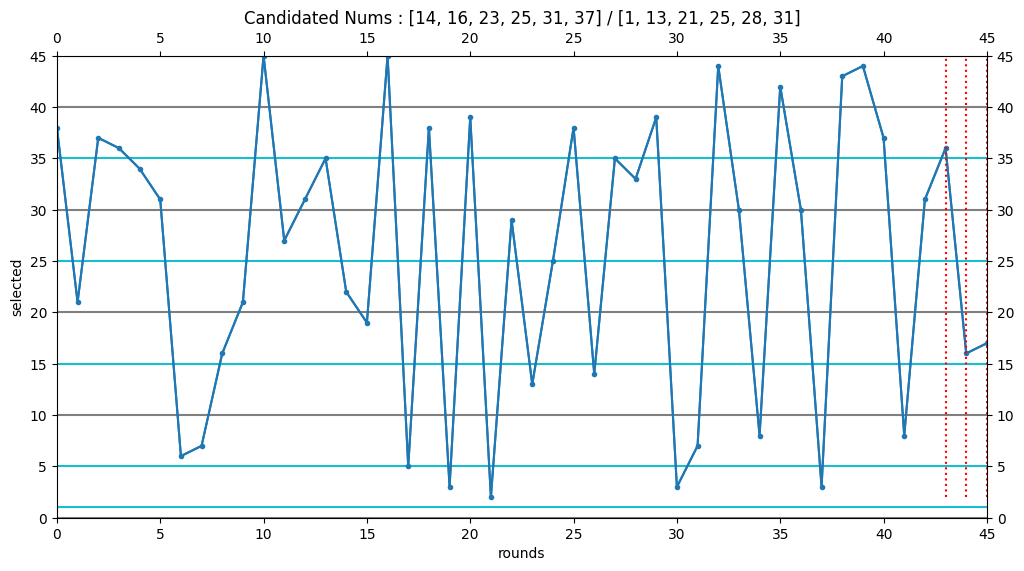

execute this code. [2025-08-18 17:41:14.608259]


In [154]:
row_nums = [1]
draw_frequency(row_nums=row_nums, next_num=next_nums[row_nums[0]-1])


select n2 from results_order order by round asc;
show_cols = [0]


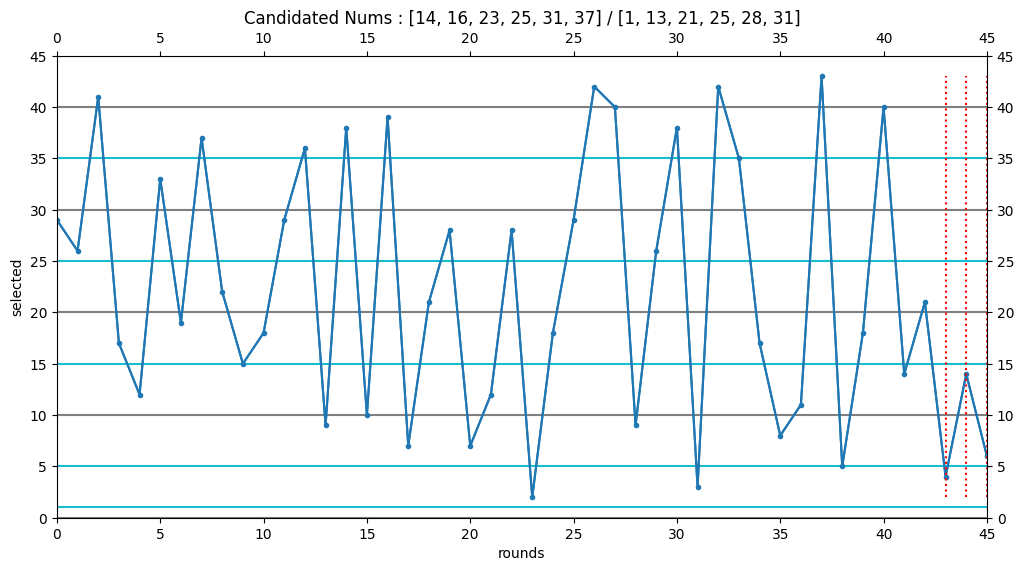

execute this code. [2025-08-18 17:41:36.165268]


In [155]:
row_nums = [2]
draw_frequency(row_nums=row_nums, next_num=next_nums[row_nums[0]-1])


select n3 from results_order order by round asc;
show_cols = [0]


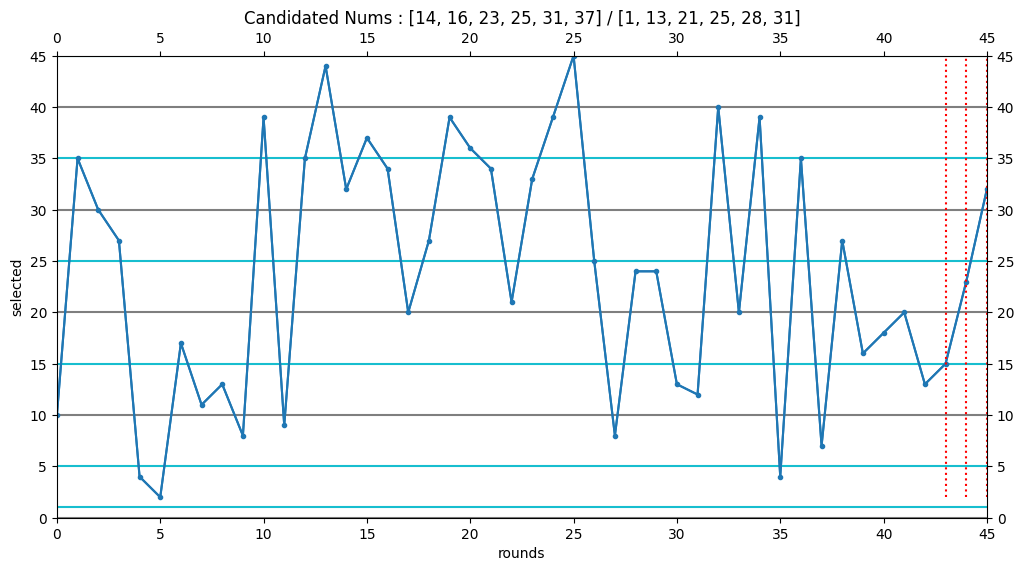

execute this code. [2025-08-18 17:41:37.114700]


In [156]:
row_nums = [3]
draw_frequency(row_nums=row_nums, next_num=next_nums[row_nums[0]-1])


select n4 from results_order order by round asc;
show_cols = [0]


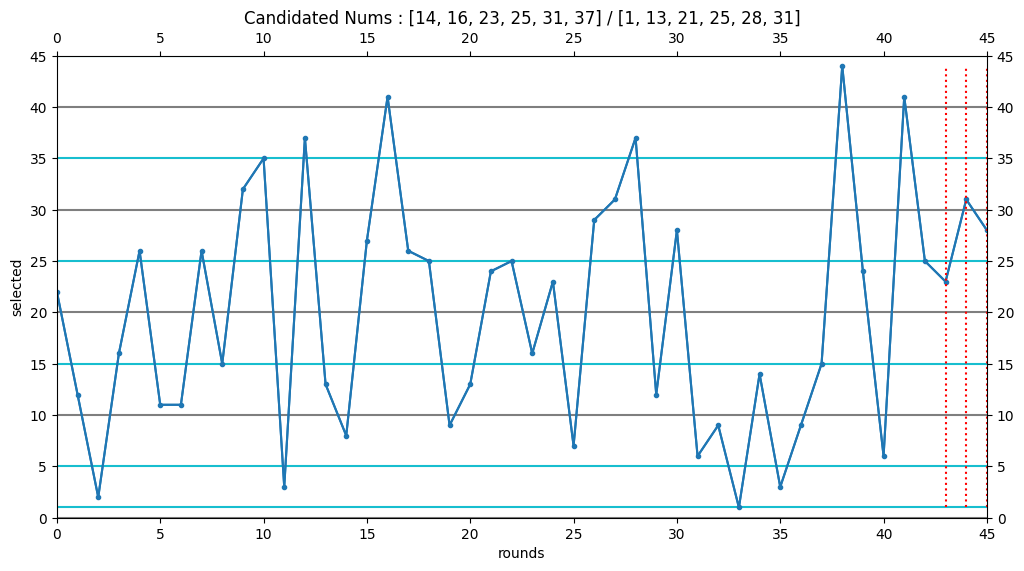

execute this code. [2025-08-18 17:41:37.754646]


In [157]:
row_nums = [4]
draw_frequency(row_nums=row_nums, next_num=next_nums[row_nums[0]-1])


select n5 from results_order order by round asc;
show_cols = [0]


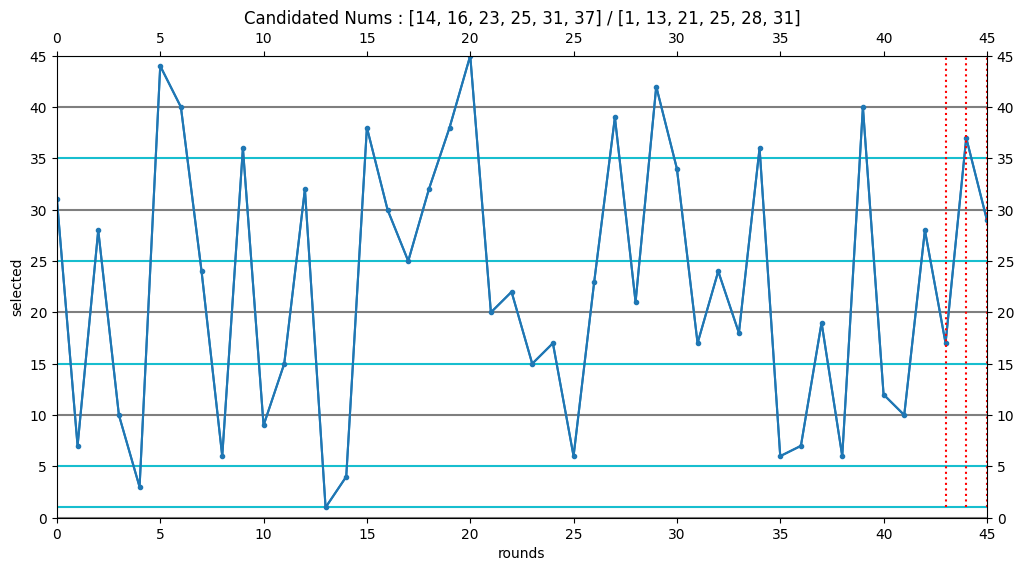

execute this code. [2025-08-18 17:41:38.401158]


In [158]:
row_nums = [5]
draw_frequency(row_nums=row_nums, next_num=next_nums[row_nums[0]-1])


select n6 from results_order order by round asc;
show_cols = [0]


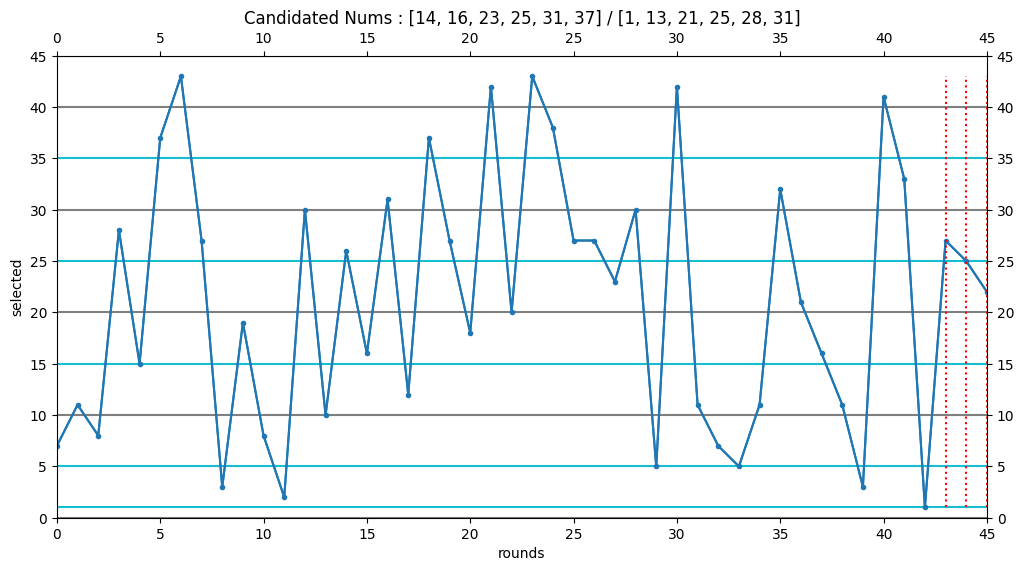

execute this code. [2025-08-18 17:41:39.392167]


In [159]:
row_nums = [6]
draw_frequency(row_nums=row_nums, next_num=next_nums[row_nums[0]-1])


select n1, n2, n3, n4, n5, n6 from results_order order by round asc;
show_cols = [0, 1, 2, 3, 4, 5]


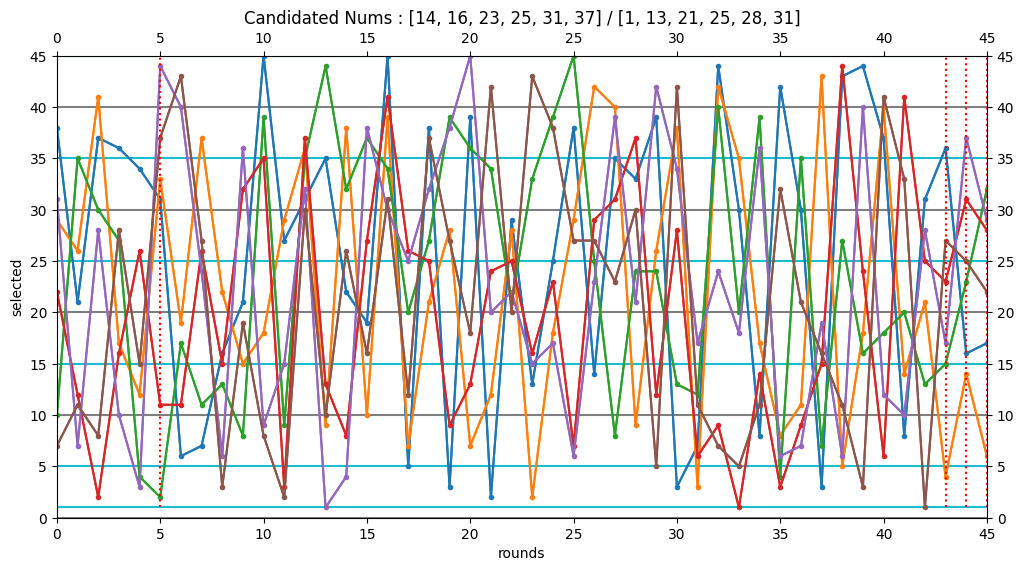

execute this code. [2025-08-18 17:42:08.674125]


In [160]:
row_nums = [1, 2, 3, 4, 5, 6]
draw_frequency(row_nums=row_nums, next_num=next_nums)


In [108]:
next_nums.sort()
print(next_nums)

[1, 2, 3, 4, 5, 6]
